## 1. Data Preparation
 The dataset is a .csv file and ready for analysis

In [7]:
import pandas as pd

# Load dataset
file_path = 'netflix_data.csv'  
data = pd.read_csv(file_path)

# Display first few rows
print(data.head())


    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  Un

## 2. Data Cleaning

In [41]:
# Check for missing values
print(data.isnull().sum())

# Drop rows/columns or fill missing values as appropriate
data_cleaned = data.ffill() 

# Verify
print(data_cleaned.isnull().sum())  


show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


## 3. Data Exploration

In [13]:
# Summary statistics
print(data_cleaned.describe())

# Data information
print(data_cleaned.info())


            show_id  release_year
count  6.234000e+03    6234.00000
mean   7.670368e+07    2013.35932
std    1.094296e+07       8.81162
min    2.477470e+05    1925.00000
25%    8.003580e+07    2013.00000
50%    8.016337e+07    2016.00000
75%    8.024489e+07    2018.00000
max    8.123573e+07    2020.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      6234 non-null   object
 4   cast          6234 non-null   object
 5   country       6234 non-null   object
 6   date_added    6234 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6234 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object

#### 3a. Statistical Analysis of the most watched genres 

In [20]:
# Count unique genres
print(data_cleaned['listed_in'].value_counts())

listed_in
Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
                                                   ... 
TV Comedies, TV Dramas, TV Mysteries                  1
Classic Movies, Dramas, LGBTQ Movies                  1
Crime TV Shows, TV Dramas, TV Sci-Fi & Fantasy        1
Docuseries, Reality TV, Teen TV Shows                 1
Reality TV, Spanish-Language TV Shows                 1
Name: count, Length: 461, dtype: int64


#### 3b. Statistical Analysis of the ratings Distribution

In [19]:
# Analyze rating distribution
print(data_cleaned['rating'].value_counts())

rating
TV-MA       2032
TV-14       1699
TV-PG        704
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         150
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: count, dtype: int64


## 4. Data Visualization

### 4a. Data visualization of the most watched genres

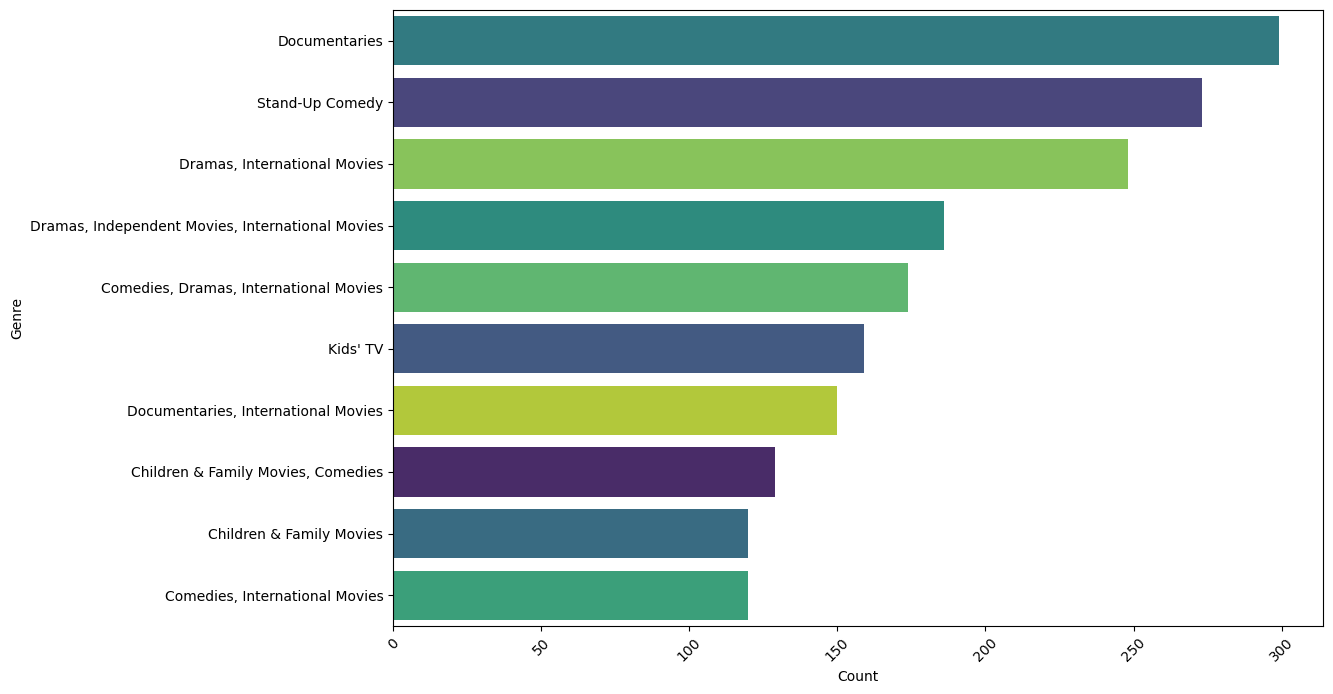

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Most watched genres
plt.figure(figsize=(12, 8))
top_genres = data_cleaned['listed_in'].value_counts().nlargest(10).index

# Show top 10 genres
sns.countplot(y='listed_in', data=data_cleaned[data_cleaned['listed_in'].isin(top_genres)], order=top_genres, hue='listed_in', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.show()


### 4b. Data visualization of the ratings distribution

In [39]:
# Ratings distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['rating'], bins=10, kde=True, color='red')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## 5. Data Integration into R 
### To save a cleaned version of the dataset to use in R

In [44]:
data_cleaned.to_csv('Netflix_shows_movies_cleaned.csv', index=False)